# Explanation of Association Rules

Often times, data scientists work with a non-technical audiences that have little to no experience in the either computer science, statistics or machine learning. This is okay, because there is a need for variety in roles across a team or company. However, poses interesting challenges in dignifying certain analytics based projects with the value and resources that they deserve. As a result, the burden of socializing the value of these types of projects lies on the data scientists themselves. 

The adoption of these analytics practices is a challenging undertaking for a team or company without a mature approach to tech innovation. Lagging companies often rely on heuristics or anecdotals rather than empirical evidence. One way analytics professionals can make a difference in pushing data driven culture forward is to earn credibility by being clear in explanation of methodology. Too often, data scientists explain esoteric topics with a hand wave and a broad generalization which comes off as disingenuous.

The way to build creditability in these situations is to start with something simple, something to get stakeholders and peers thinking about applicable problems. As an example, in the field of recommenders, association rule mining is a good technique to begin with, because it is simple enough to understand out of the box. There is no, misleading generalizations and can be understood by most with a simple demonstration (something that cannot be said for more advanced techniques). While it may not be as exciting, a successful of campaign or project incorporating these rules in marketing, sales or category management can lead the way in opening people up to additional methodologies. But the trust between the data scientist and the peers needs to be established first.

Now that we can see the value in implementing such rules, what can they be used for? and how is it done? Both of these will be answered by the end of this post, so that way you can begin to implement these into your data science pipeline.

## What is it good for?

Ultimately, association rule mining is a method that creates if-then statements centered around product baskets. As an example, if you were in the grocery store, and you bought peanut butter then you would probably be more likely to also buy jelly. While it seems like an asinine, common sense judgement, these types of relationships exist in all industries and can be leveraged to improve a company operational efficiency. Here are a few of the applications of association rules:

 * Marketing campaigns that your team is riding on so much can be improved in leads generated or click through
 * The sales team trying to find products to upsell can easily be found
 * Supply chain issues you've been having because of inefficient storage 

Generally, these rules are useful in synthesizing alike products and complements. I may do a specific post on the application recommenders, but it out of the scope of this post.    

## The Math

Now to implement the algorithm itself. I am using my version of association rules available [here](https://github.com/tomscolaro/associationrules). There are 3 key calculations that association rules mining accounts for: support, confidence and lift. 

### Support
Support can be thought of as the frequency of occurrence in a transaction set. If apples are present twice in a set of 5 transactions, then the support is .4.  This is done of each combination of products above a threshold, which allows for faster computation. The support of A (a product or a combination in the set N) is:


$
Support(A) = \dfrac{\sigma ({A})}{ \vert T \vert} > SupportThreshold
$

$
A = {N \choose x} 
$


where $\sigma$ denotes the frequency of occurrence in the set. It is also important to note that the number of elements in the combination are $0 < x < { \vert T \vert}$.



### Confidence

Confidence brings the idea of antecedent and consequents into the mix. An antecedent is the product purchased to begin with (the "if" part of the rules), and the consequent would be the product recommended in response to the antecedent (the "then" part of the rule). The confidence is how many times in a transaction set that the rule appears to be true. Statistically, this is likened to the conditional probability $pr(B  \vert  A)$.  The name of the measurement would suggest this is "accuracy", but this isn't necessarily true. As confidence will be higher if the consequent has a high support, regardless of the relationship between the antecedent and consequent.

$
Confidence(A \to\, B) = \dfrac{Support({A \cup B})}{Support(A)} 
$


### Lift

Lift is probably the most important measure of association rules mining. Essentially, it measures how good the rule is. Because lift assumes statistical independence between the antecedent and the consequent in the denominator and uses joint probability in numerator, we can infer whether there is conditional dependence between the antecedent and consequent. 

   * When lift > 1 the antecedent and consequent occur together more frequently, implying that the A and B are dependent and occur at higher frequencies. The higher the better, and we want to use these rules as much as we can.
    
   * When lift < 1 the antecedent and consequent occur together less frequently, implying that the A and B are dependent and occur at lower frequencies. The closer to 0 that the rule is, the worse the rule would perform. However, we can use this to avoid sub optimal decisions. As an example, in a limited shelving space display, avoiding placing poor lift baskets together.

   * When lift ${ \approx }$ 1 the antecedent and consequent occur at about the same frequency. This would suggest that the association of the two rules is just by random chance. 
 

$
Lift(A \to\, B) =\dfrac{Support({A \cup B})}{Support{(A)}* Support{(B)}} 
$


## Implementation

Import the libraries used in the project. association_rules is available [here](https://github.com/tomscolaro/associationrules)

In [1]:
import pandas as pd
import numpy as np
import association_rules as ar

Read in the transaction data. Each product is associated with a transaction id where 1 or more products can be purchased at a time.

In [2]:
df = pd.read_csv('../data/sales_data.csv')
df.head()

,SALES_ID,PRODUCT
0,1001,Tortillas
1,1001,Eggs
2,1001,Bacon
3,1001,Cheddar
4,1001,Avocado


This step is just data exploration. The dataset we are using is a mock up, so it is cleaned and ready to go. However, in reality more exploration would be needed to clean and preprocess the data. We can see that beer, milk and cookies all have high occurances in the data set, so we can infer there will be rules including some of them. 

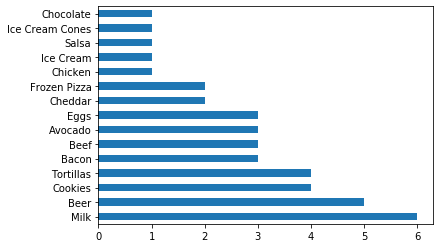

In [3]:
df['PRODUCT'].value_counts().plot.barh()

For the linked repo, the data must be a boolean dataframe with the products in the columns, where each row signifies a transaction. This can be accomplished by using the pivot pandas method and replacing null values with True/False values. 

In [4]:
df = df.pivot(index='SALES_ID', columns='PRODUCT', values='PRODUCT')
df = pd.DataFrame(np.where(df.isnull(), False, True), columns =df.columns).copy()
df.head()

PRODUCT,Avocado,Bacon,Beef,Beer,Cheddar,Chicken,Chocolate,Cookies,Eggs,Frozen Pizza,Ice Cream,Ice Cream Cones,Milk,Salsa,Tortillas
0,True,True,True,True,True,False,True,False,True,False,False,False,False,False,True
1,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
3,False,True,True,False,False,False,False,True,True,False,False,False,True,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True


The association rules object is initiated with the boolean dataframe from the previous step along with threshold type and level. It defaults to support and .3, respectively, but can limited by lift or confidence as well. 

In [5]:
association_rules = ar.association_rules(df, threshold_type='support', threshold_level=.3)

We can access the support, confidence or lift rules by using any of the .get_support(), .get_confidence() or .get_lift() methods.


In [6]:
support = association_rules.get_support().sort_values(['support'], ascending=False)
support

,support,products
11,0.666667,Milk
8,0.555556,Beer
9,0.444444,Cookies
12,0.444444,Tortillas
0,0.333333,"Avocado, Beer"
1,0.333333,"Bacon, Eggs"
2,0.333333,"Beer, Milk"
3,0.333333,"Beer, Tortillas"
4,0.333333,"Cookies, Milk"
5,0.333333,Avocado


Finally, we can access the total rules with the .get_rules() method. Viewing the rules from the mock dataset, we can see that Bacon and Eggs is a valuable rule with a lift of 3.0 and a rule to avoid would be Milk and Beer with a lift of 0.9.  

In [7]:
rules = association_rules.get_rules()
rules

,antecedent,consequent,antecedent_support,consequent_support,confidence,lift
0,Avocado,Beer,0.333333,0.555556,1.00,1.800
1,Milk,Beer,0.666667,0.555556,0.50,0.900
2,Tortillas,Beer,0.444444,0.555556,0.75,1.350
3,Bacon,Eggs,0.333333,0.333333,1.00,3.000
4,Beer,Avocado,0.555556,0.333333,0.60,1.800
5,Beer,Milk,0.555556,0.666667,0.60,0.900
6,Cookies,Milk,0.444444,0.666667,0.75,1.125
7,Beer,Tortillas,0.555556,0.444444,0.60,1.350
8,Eggs,Bacon,0.333333,0.333333,1.00,3.000
9,Milk,Cookies,0.666667,0.444444,0.50,1.125


## Conclusion

We have seen why association rule mining is important, some potential applications for a business and an implementation of the analysis in python. Ultimately, the power that can be leveraged out of the analysis is only limited by the creativity of the solution. I urge you to try it for yourself and be inventive in the ways that association rule mining can improve your ML and technology pipelines. In future posts, I hope to build upon this and apply the outputs of the analysis to optimize of resources across marketing, sales and ops applications. 

-Tom Scolaro [LinkedIn](https://www.linkedin.com/in/thomasscolaro)
